# Assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [135]:
import pandas as pd
import seaborn as sns
import numpy as np

penguins = sns.load_dataset("penguins")
penguins = penguins.dropna() #Deze is erg belangrijk omdat je alle rijen waar een lege waarde in zit wilt verwijderen.

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

from sklearn.model_selection import train_test_split

### Split the penguin dataset into a train (70%) and test (30%) set.

In [136]:
train, test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species'])
print(train.shape, test.shape)

(233, 7) (100, 7)


### Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.

In [137]:
features = ['bill_length_mm', 'bill_depth_mm']
dt_classification = DecisionTreeClassifier(max_depth=4)
dt_classification.fit(train[features], train['species'])

DecisionTreeClassifier(max_depth=4)

### Use your decision tree model to make predictions for both the train and test set.

In [138]:
predictions = dt_classification.predict(penguins[features])
predictions

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',

### Calculate the accuracy for both the train set predictions and test set predictions.

In [139]:
predictionResultTraining = dt_classification.predict(train[features])
predictionResultTest = dt_classification.predict(test[features])

# Calculate the accuracy for both the train set predictions and test set predictions. 
accuracyTraining = calculate_accuracy(predictionResultTraining, train.species)
accuracyTest = calculate_accuracy(predictionResultTest, test.species)

print(accuracyTraining)
print(accuracyTest)

0.9828326180257511
0.96


### Is the accurracy different? Did you expect this difference?

Het verschil tussen de twee waardes is 2,2 en dat lijkt me in principe niet heel veel. Maar toch had ik verwacht dat het verschil nog kleiner zou zijn omdat je toch 233 tegenover 100 waardes hebt gezet.

### Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

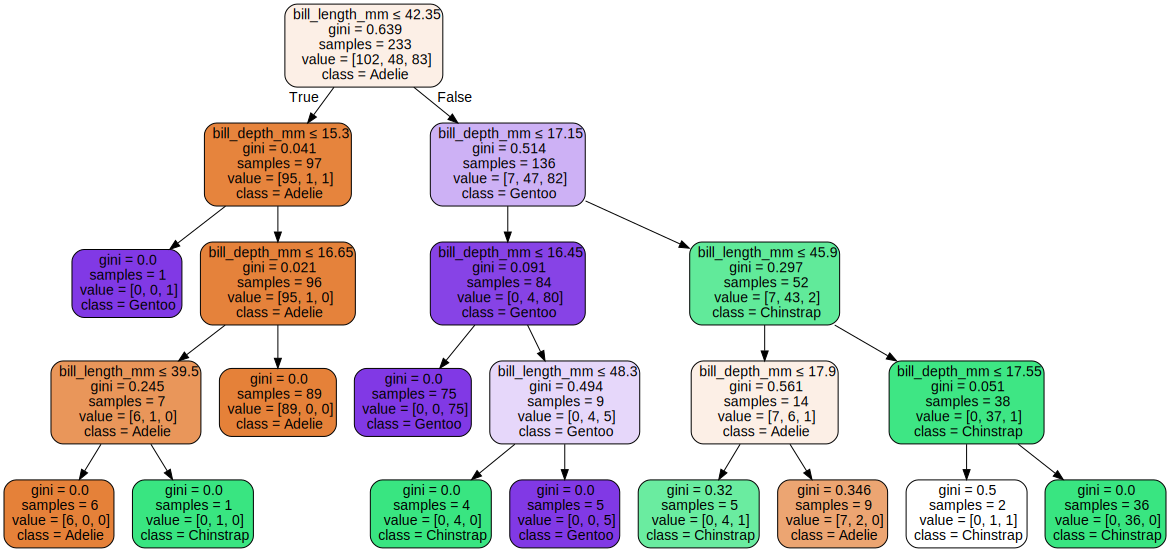

In [140]:
plot_tree_classification(dt_classification, features, np.sort(penguins.species.unique()))